In [1]:
import glob
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
labels_list = np.load('/datax/scratch/benjb/hdbscan_labels_20.npz')['arr_0']

In [4]:
lfiles = ['/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

filename = '/datax/scratch/benjb/m31_l_data/' + lfiles[0][44:-2] + 'dat'

df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

ctr_freqs = df0['Uncorrected_Frequency'].values

In [5]:
fb = bl.Waterfall(lfiles[0])

In [40]:
noise_idxs = np.where(labels_list == -1)[0]
class_0_idxs = np.where(labels_list == 0)[0]
class_1_idxs = np.where(labels_list == 1)[0]
class_2_idxs = np.where(labels_list == 2)[0]
class_3_idxs = np.where(labels_list == 3)[0]
class_4_idxs = np.where(labels_list == 4)[0]
class_5_idxs = np.where(labels_list == 5)[0]

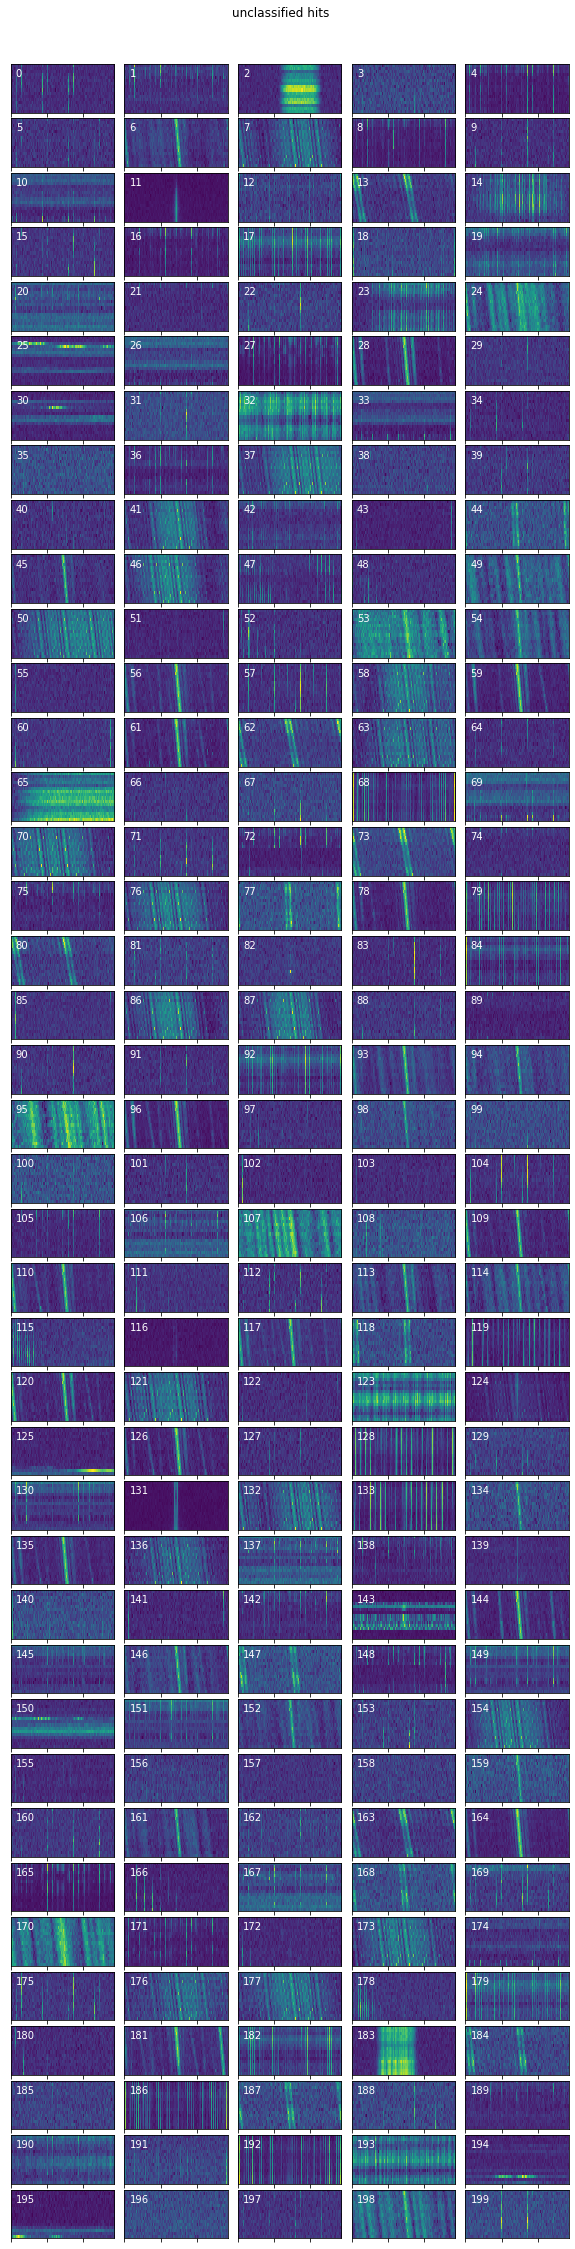

In [41]:
freqs, full_dynamic_spectrum = fb.grab_data()

n = len(noise_idxs)
n = 200

shuffle_idxs = np.arange(len(ctr_freqs))
np.random.shuffle(shuffle_idxs)
ctr_freqs_shuffled = ctr_freqs[shuffle_idxs]

fig, axs = plt.subplots(n//5, 5, figsize=(10, n//5))
for i in range(n//5): # rows
    for j in range(5):     # columns
        dynamic_spectrum = full_dynamic_spectrum[:,
                                                 np.where((freqs < ctr_freqs_shuffled[noise_idxs[5*i+j]]+0.001) & 
                                                          (freqs > ctr_freqs_shuffled[noise_idxs[5*i+j]]-0.001))[0]
                                                          ]
        axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
        axs[i][j].set_xticklabels([])
        axs[i][j].set_yticklabels([])
        axs[i][j].set_yticks([])
        axs[i][j].text(0.05, 0.75, f'{5*i+j}', size=10, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)

fig.suptitle('unclassified hits',  fontsize=12, y=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.12)
plt.savefig('/datax/scratch/benjb/unclassified_hits.pdf', bbox_inches='tight')

#fb.plot_waterfall(f_start=ctr_freqs[class_3_idxs[idx]]-0.001, f_stop=ctr_freqs[class_3_idxs[idx]]+0.001, logged=True)